<a href="https://colab.research.google.com/github/a-apte/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("seaborn-white")
# style.use("ggplot")

import numpy as np
import pandas as pd


## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

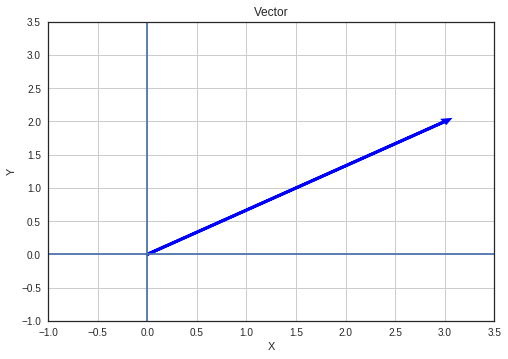

In [2]:
oo = [0,0]
a = [3,2]


plt.arrow(oo[0],oo[1],a[0],a[1], head_width=.05, linewidth = 3, head_length=0.05, color ='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-1,3.5)          
plt.ylim(-1,3.5)
plt.grid(True)


plt.axhline(y=0)
plt.axvline(x=0)

plt.title("Vector")


plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = [17,-4,-2,1]

f"The norm of the vector b is {np.dot(b,b)}"

'The norm of the vector b is 310'

The norm of the vector represents that vector's **magnitude**.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = [3, 7, -2, 12]
d = [9,-7,4,6]


np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
E = np.matrix('7 4 2; 1 3 -1; 2 6 -4')

Einv = np.linalg.inv(E)

Einv

matrix([[ 0.17647059, -0.82352941,  0.29411765],
        [-0.05882353,  0.94117647, -0.26470588],
        [ 0.        ,  1.        , -0.5       ]])

In [6]:
E_transpose = np.transpose(E)

E_transpose

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [7]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [8]:
print(df.describe())

print("\nVariance")
print(df.var())


         customers      snow
count     7.000000  7.000000
mean   1135.714286  2.714286
std     314.264069  2.927700
min     760.000000  0.000000
25%     905.000000  0.500000
50%    1080.000000  1.000000
75%    1350.000000  5.000000
max    1600.000000  7.000000

Variance
customers    98761.904762
snow             8.571429
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [9]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


The variances of the number of customers and inches of snow are not comparable because the units of each are different (customers^2 vs inches^2). One would need a third factor relating customers^2 and inches^2 to do a fair comparison.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [10]:
df.cov() # Variances on the diagonal, covariances elsewhere.

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [11]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [12]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1) # Dropping a Column
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [13]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values # Returns values only from the dataframe
numpy_X = numpy_X.astype(float)

print(numpy_X)

[[ 375.   57.  245. 1472.  105.   54.  193.  147. 1102.  720.  253.  685.
   488.  198.  360. 1374.  156.]
 [ 475.   73.  227. 1582.  103.   64.  235.  160. 1137.  874.  265.  803.
   570.  203.  365. 1256.  175.]
 [ 458.   53.  242. 1462.  103.   62.  184.  122.  957.  566.  171.  750.
   418.  220.  337. 1572.  147.]
 [ 135.   47.  267. 1494.   66.   41.  209.   93.  674. 1033.  143.  586.
   355.  187.  334. 1506.  139.]]


**fit()**

In [14]:
##### Your Code Here #####

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = True, with_std = True)
# print(scaler.fit(numpy_X))

X_fit = scaler.fit(numpy_X)

print(X_fit.mean_)

print(X_fit.var_)



[ 360.75   57.5   245.25 1502.5    94.25   55.25  205.25  130.5   967.5
  798.25  208.    706.    457.75  202.    349.   1427.    154.25]
[18419.1875    92.75     204.1875  2240.75     266.6875    81.6875
   375.1875   655.25   33268.25   30227.1875  2717.      6546.5
  6413.1875   141.5      186.5    14829.       179.6875]


**transform()**

In [15]:
X_T = pd.DataFrame(scaler.transform(numpy_X))
X_T.describe().T

,count,mean,std,min,25%,50%,75%,max
0,4.0,0.000000e+00,1.154701,-1.663384,-0.337098,0.410780,0.747878,0.841823
1,4.0,-5.551115e-17,1.154701,-1.090266,-0.623009,-0.259587,0.363422,1.609440
2,4.0,0.000000e+00,1.154701,-1.277169,-0.489873,-0.122468,0.367405,1.522105
3,4.0,6.938894e-18,1.154701,-0.855575,-0.697136,-0.411944,0.285192,1.679463
4,4.0,0.000000e+00,1.154701,-1.729885,-0.030617,0.535805,0.566422,0.658275
5,4.0,5.551115e-17,1.154701,-1.576656,-0.497891,0.304267,0.802159,0.968122
6,4.0,6.938894e-18,1.154701,-1.097071,-0.748590,-0.219414,0.529175,1.535899
7,4.0,0.000000e+00,1.154701,-1.464967,-0.615286,0.156263,0.771549,1.152440
8,4.0,0.000000e+00,1.154701,-1.609137,-0.445460,0.339920,0.785380,0.929297
9,4.0,0.000000e+00,1.154701,-1.335847,-0.671519,-0.007190,0.664329,1.350227


**fit_transform()**

In [16]:
X_FT = pd.DataFrame(scaler.fit_transform(numpy_X))

X_FT.describe().T

,count,mean,std,min,25%,50%,75%,max
0,4.0,0.000000e+00,1.154701,-1.663384,-0.337098,0.410780,0.747878,0.841823
1,4.0,-5.551115e-17,1.154701,-1.090266,-0.623009,-0.259587,0.363422,1.609440
2,4.0,0.000000e+00,1.154701,-1.277169,-0.489873,-0.122468,0.367405,1.522105
3,4.0,6.938894e-18,1.154701,-0.855575,-0.697136,-0.411944,0.285192,1.679463
4,4.0,0.000000e+00,1.154701,-1.729885,-0.030617,0.535805,0.566422,0.658275
5,4.0,5.551115e-17,1.154701,-1.576656,-0.497891,0.304267,0.802159,0.968122
6,4.0,6.938894e-18,1.154701,-1.097071,-0.748590,-0.219414,0.529175,1.535899
7,4.0,0.000000e+00,1.154701,-1.464967,-0.615286,0.156263,0.771549,1.152440
8,4.0,0.000000e+00,1.154701,-1.609137,-0.445460,0.339920,0.785380,0.929297
9,4.0,0.000000e+00,1.154701,-1.335847,-0.671519,-0.007190,0.664329,1.350227


**While the mean is centered at 0, the standard deviation is not scaled to 1 in this data for some reason.**

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [17]:
##### Your Code Here #####

from numpy import array
from sklearn.decomposition import PCA
# define a matrix
# X = 
print("Data: \n", X_FT)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(X_FT)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(X_FT)
print("\n Projected Data: \n", B)

Data: 
          0         1         2         3         4         5         6   \
0  0.104998 -0.051917 -0.017495 -0.644322  0.658275 -0.138303 -0.632429   
1  0.841823  1.609440 -1.277169  1.679463  0.535805  0.968122  1.535899   
2  0.716563 -0.467257 -0.227441 -0.855575  0.535805  0.746837 -1.097071   
3 -1.663384 -1.090266  1.522105 -0.179565 -1.729885 -1.576656  0.193601   

         7         8         9         10        11        12        13  \
0  0.644585  0.737407 -0.450076  0.863312 -0.259546  0.377736 -0.336265   
1  1.152440  0.929297  0.435696  1.093528  1.198856  1.401682  0.084066   
2 -0.332059 -0.057567 -1.335847 -0.709834  0.543811 -0.496364  1.513193   
3 -1.464967 -1.609137  1.350227 -1.247006 -1.483121 -1.283054 -1.260994   

         14        15        16  
0  0.805477 -0.435231  0.130551  
1  1.171603 -1.404236  1.547958  
2 -0.878702  1.190727 -0.540853  
3 -1.098378  0.648741 -1.137656  

 Eigenvectors: 
 [[-0.25509484 -0.27747513  0.28562914 -0.17843996 -0

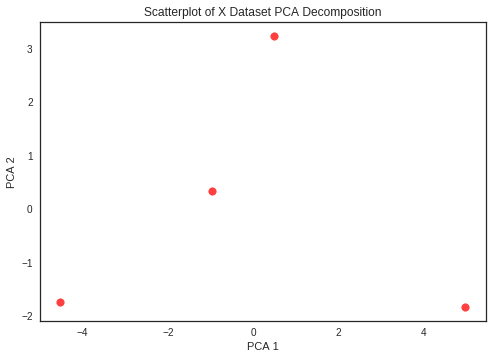

In [18]:
df_pca = pd.DataFrame(B)

plt.scatter(df_pca[0], df_pca[1], color = 'red', s = 60, alpha=0.75) # c=datacolor, 


plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Scatterplot of X Dataset PCA Decomposition")
plt.show()

##### Using non-scaled Data (for contrast)

Data: 
    Alcoholic Drinks  Beverages  Carcass_Meat  Cereals  Cheese  Confectionery  \
0               375         57           245     1472     105             54   
1               475         73           227     1582     103             64   
2               458         53           242     1462     103             62   
3               135         47           267     1494      66             41   

   Fats_and_Oils  Fish  Fresh_Fruit  Fresh_Potatoes  Fresh_Veg  Other_Meat  \
0            193   147         1102             720        253         685   
1            235   160         1137             874        265         803   
2            184   122          957             566        171         750   
3            209    93          674            1033        143         586   

   Other_Veg  Processed_Potatoes  Processed_Veg  Soft_Drinks  Sugars  
0        488                 198            360         1374     156  
1        570                 203            365         12

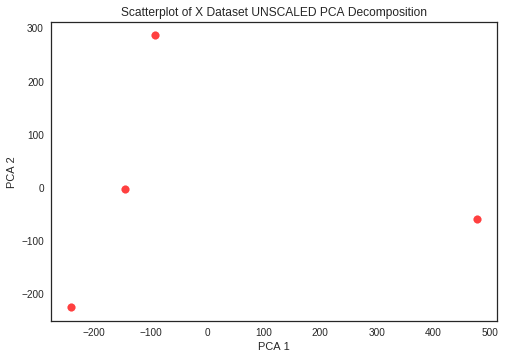

In [19]:
# Unscaled Data

from numpy import array
from sklearn.decomposition import PCA
# define a matrix
# X = 
print("Data: \n", X)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(X)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B_unscaled = pca.transform(X)
print("\n Projected Data: \n", B_unscaled)

print("\n\n")

df_pca_unscaled = pd.DataFrame(B_unscaled)

plt.scatter(df_pca_unscaled[0], df_pca_unscaled[1], color = 'red', s = 60, alpha=0.75) # c=datacolor, 

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Scatterplot of X Dataset UNSCALED PCA Decomposition")
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [20]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [21]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values

print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

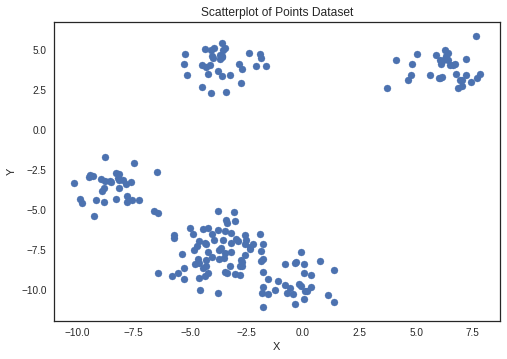

In [22]:
plt.scatter(points.x, points.y)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of Points Dataset")
plt.show()

In [23]:
##### Your Code Here #####

# Scaling

X_FT_points = pd.DataFrame(scaler.fit_transform(numpy_points))

X_FT_points.describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,4.662937e-17,8.881784e-18
std,1.002509e+00,1.002509e+00
min,-1.715069e+00,-1.378308e+00
25%,-5.052073e-01,-8.665439e-01
50%,-2.311267e-01,-3.385765e-01
75%,4.171789e-01,1.218429e+00
max,2.229030e+00,1.671647e+00


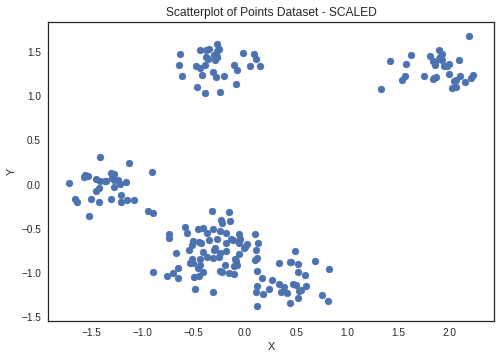

In [24]:
plt.scatter(X_FT_points[0], X_FT_points[1])

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of Points Dataset - SCALED")
plt.show()

**Elbow Method for determining number of clusters (guessing 4 or 5)**

In [0]:
from sklearn.cluster import KMeans
k_range = range(2,11) #starts at k = 2, ends at k = 10
k_means_var = [KMeans(n_clusters=k).fit(X_FT_points) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]


In [0]:
from scipy.spatial import distance
k_dist = [distance.cdist(X_FT_points, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_dist]
wcss = [sum(d**2) for d in dist]

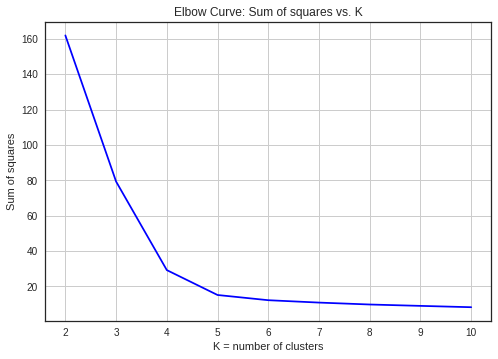

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, wcss, 'b-') #y axis is WCSS, x-axis is k_range
plt.grid(True)
plt.xlabel('K = number of clusters')
plt.ylabel('Sum of squares')
plt.title('Elbow Curve: Sum of squares vs. K')

plt.show()

**Centroids (Clusters = 4)**

In [28]:
cluster4 = KMeans(4) #default 8 clusters
cluster4.fit_predict(X_FT_points)

df_cluster4 = pd.DataFrame(cluster4.cluster_centers_)

df_cluster4

,0,1
0,-0.090272,-0.858910
1,1.886224,1.305469
2,-0.280325,1.357360
3,-1.329613,-0.034043


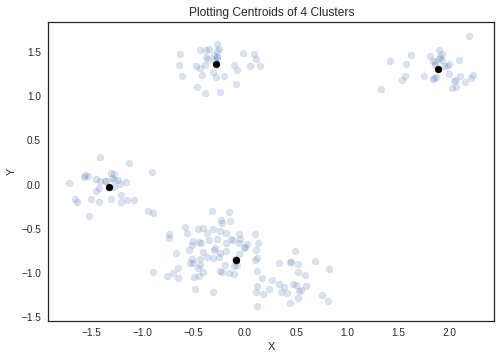

In [29]:
plt.scatter(X_FT_points[0], X_FT_points[1], alpha = 0.2)
plt.scatter(df_cluster4[0], df_cluster4[1], color = 'k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plotting Centroids of 4 Clusters")
plt.show()

**Centroids (Clusters = 5)**

In [30]:
cluster5 = KMeans(5) #default 8 clusters
cluster5.fit_predict(X_FT_points)

df_cluster5 = pd.DataFrame(cluster5.cluster_centers_)

df_cluster5

,0,1
0,1.886224,1.305469
1,-0.320618,-0.751410
2,-0.280325,1.357360
3,0.406411,-1.090709
4,-1.329613,-0.034043


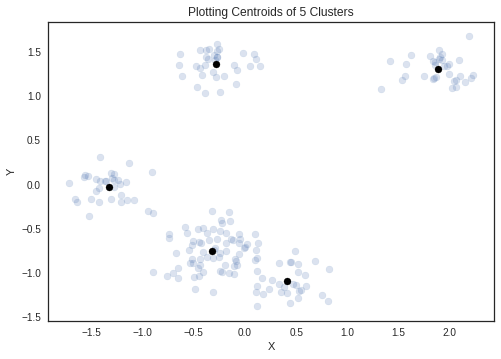

In [31]:
plt.scatter(X_FT_points[0], X_FT_points[1], alpha = 0.2)
plt.scatter(df_cluster5[0], df_cluster5[1], color = 'k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plotting Centroids of 5 Clusters")
plt.show()

**Using PCA on Dataset before doing the Cluster Analysis**

*It makes the clusters more distinct*

In [32]:
from sklearn.decomposition import PCA


pca = PCA(2)
# fit on data
pca.fit(X_FT_points)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B_points = pd.DataFrame(pca.transform(X_FT_points))
print("\n Projected Data: \n", B_points)


 Eigenvectors: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

 Eigenvalues: 
 [1.37359373 0.63645652]

 Projected Data: 
             0         1
0   -0.859119 -0.859524
1   -0.631241  0.248206
2   -0.462188  1.125087
3   -0.863236 -0.405686
4   -0.561522  1.034245
5   -0.757861 -0.067900
6   -0.927228 -0.876106
7   -0.825164 -0.986458
8    0.927155 -1.314650
9   -0.956370 -0.097936
10  -0.842527  0.318933
11  -0.778514  0.148831
12  -0.543096  1.273112
13  -0.956664  0.231654
14  -1.043723 -0.804441
15  -0.891527  1.057695
16  -0.938821 -0.692709
17  -0.399748  0.188530
18  -0.599505  0.520646
19   2.370405  0.449826
20  -0.843219 -0.912545
21   2.407776  0.264657
22   2.338904  0.339630
23   2.349550  0.366354
24  -0.702866  0.590137
25  -1.212269  0.291347
26  -0.477378  1.222357
27   1.049408 -0.836960
28  -0.983187  0.272702
29  -0.855538  0.121048
..        ...       ...
170 -1.286753 -1.054665
171 -0.579874  1.160770
172  0.824445 -1.216012
173  2.451503  0.700822
17

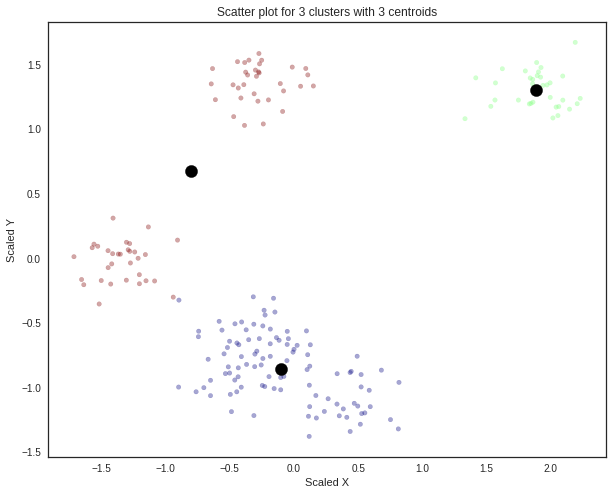

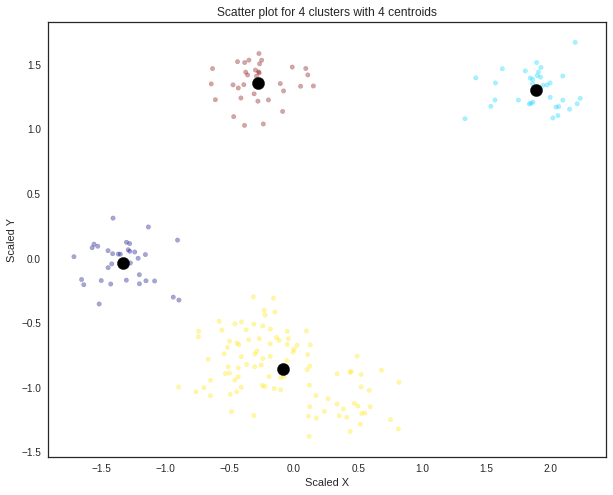

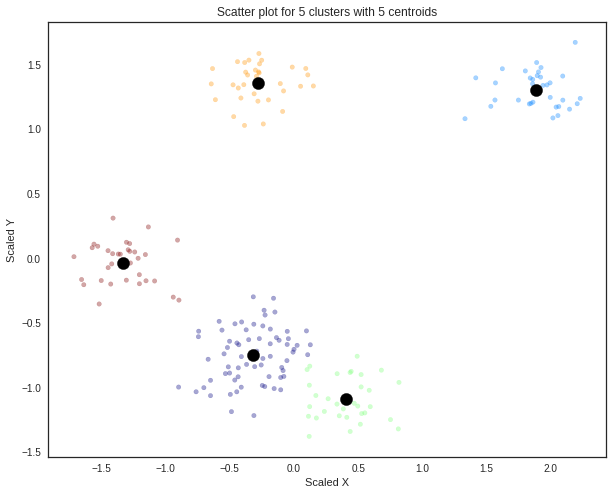

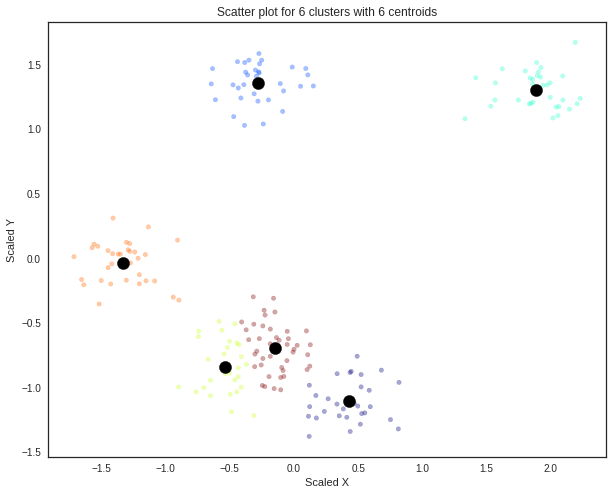

In [33]:
# Centroid Plot on Scaled Data

k_range_new = range(3,7)

for n_clusters in k_range_new:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    fig.set_size_inches(10, 8)
    kmeanscluster = KMeans(n_clusters=n_clusters, random_state=10)   
    
    X_FT_points['cluster'] = kmeanscluster.fit_predict(X_FT_points)
    cluster_df = pd.DataFrame(kmeanscluster.cluster_centers_)
 
    ax1.scatter(X_FT_points[0],X_FT_points[1], c=X_FT_points['cluster'], cmap='jet',alpha = 0.35, s = 20)
    ax1.scatter(cluster_df[0], cluster_df[1], color = 'k', marker = 'o', alpha = 1, s = 150)
    
    ax1.set_xlabel("Scaled X")
    ax1.set_ylabel("Scaled Y")
    ax1.set_title("Scatter plot for {} clusters with {} centroids".format(n_clusters, n_clusters))
    plt.show()
    
    del X_FT_points['cluster']
    del cluster_df

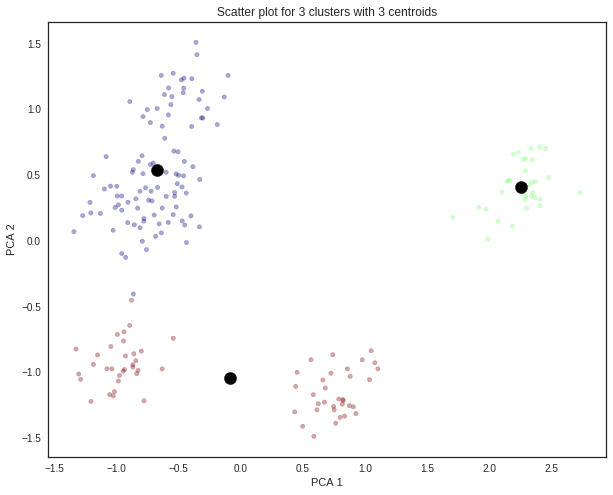

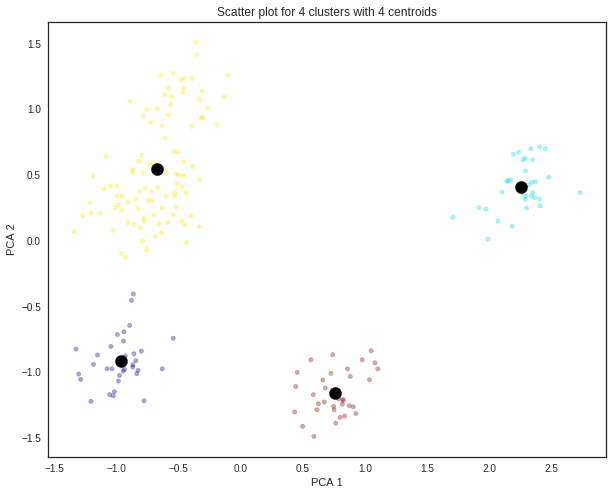

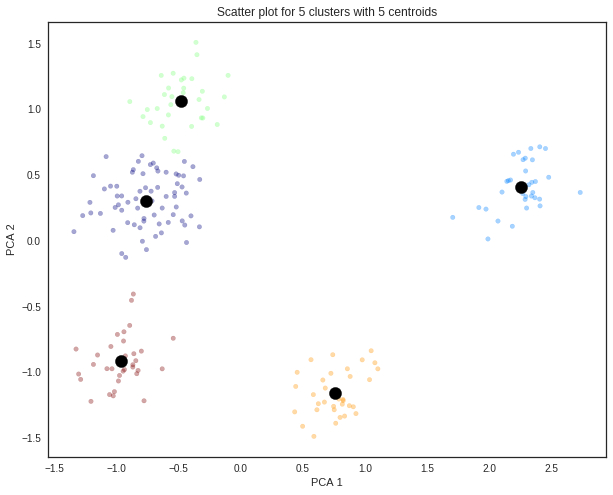

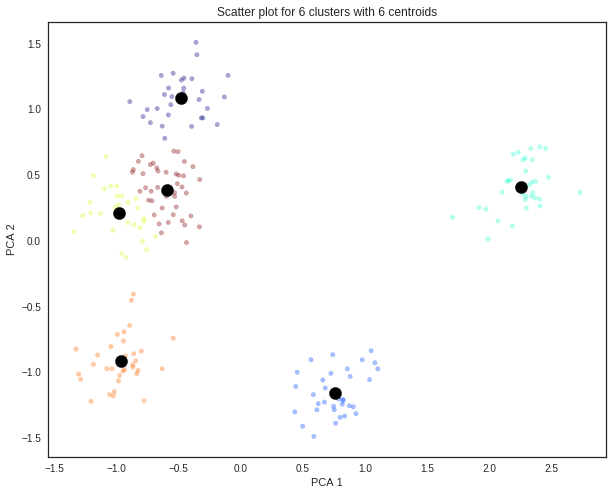

In [34]:
# PCA Plot

k_range_new = range(3,7)

for n_clusters in k_range_new:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    fig.set_size_inches(10, 8)
    kmeanscluster = KMeans(n_clusters=n_clusters, random_state=10)   
    
    B_points['cluster'] = kmeanscluster.fit_predict(B_points)
    cluster_df_pca = pd.DataFrame(kmeanscluster.cluster_centers_)
 
    ax1.scatter(B_points[0],B_points[1], c=B_points['cluster'], cmap='jet',alpha = 0.35, s = 20)
    ax1.scatter(cluster_df_pca[0], cluster_df_pca[1], color = 'k', marker = 'o', alpha = 1, s = 150)
    
    ax1.set_xlabel("PCA 1")
    ax1.set_ylabel("PCA 2")
    ax1.set_title("Scatter plot for {} clusters with {} centroids".format(n_clusters, n_clusters))
    plt.show()
    
    del B_points['cluster']
    del cluster_df_pca